<a href="https://colab.research.google.com/github/sheikh495/Data_mining/blob/main/M7_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!pip install spacy
!pip install textblob
!pip install gensim
!pip install stanfordnlp

! GRAPHS https://colab.research.google.com/drive/1FUBGbE_oGYsFWkYqmut5DW95DtM6jKZi?usp=sharing#scrollTo=Aw24qZ7fSyNw



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.1 MB/s eta 0:00:00
/bin/bash: line 1: GRAPHS: command not found


In [2]:
pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=5349d92f87492e27d67ac2e98d3d5a6a77338afcc01ce0da2c06211602034a1e
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [5]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [6]:
!spark-submit --version


Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.1.1
      /_/
                        
Using Scala version 2.12.10, OpenJDK 64-Bit Server VM, 1.8.0_362
Branch HEAD
Compiled by user ubuntu on 2021-02-22T01:33:19Z
Revision 1d550c4e90275ab418b9161925049239227f3dc9
Url https://github.com/apache/spark
Type --help for more information.


In [37]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("CustomerShoppingData").getOrCreate()

# Read the CSV file into a DataFrame
file_path = "/content/sample_submission.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows of the DataFrame
data.show()

# Print the schema of the DataFrame
data.printSchema()

# Stop the SparkSession
spark.stop()


+-------+-----------------+-----------------+-----------------+
|     id|              EAP|              HPL|              MWS|
+-------+-----------------+-----------------+-----------------+
|id02310|0.403493538995863|0.287808366106543|0.308698094897594|
|id24541|0.403493538995863|0.287808366106543|0.308698094897594|
|id00134|0.403493538995863|0.287808366106543|0.308698094897594|
|id27757|0.403493538995863|0.287808366106543|0.308698094897594|
|id04081|0.403493538995863|0.287808366106543|0.308698094897594|
|id27337|0.403493538995863|0.287808366106543|0.308698094897594|
|id24265|0.403493538995863|0.287808366106543|0.308698094897594|
|id25917|0.403493538995863|0.287808366106543|0.308698094897594|
|id04951|0.403493538995863|0.287808366106543|0.308698094897594|
|id14549|0.403493538995863|0.287808366106543|0.308698094897594|
|id22505|0.403493538995863|0.287808366106543|0.308698094897594|
|id24002|0.403493538995863|0.287808366106543|0.308698094897594|
|id18982|0.403493538995863|0.28780836610

In [53]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StandardScaler, VectorAssembler

# Create a SparkSession
spark = SparkSession.builder.appName("CustomerShoppingDataExploration").getOrCreate()

# Read the CSV file into a DataFrame
file_path = "/content/sample_submission.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Data Exploration Tasks

# Check the schema of the DataFrame
data.printSchema()

# Display summary statistics of numerical columns
data.describe().show()

# Check the first few rows of the DataFrame
data.show(5)

# Select numerical columns for normalization
columns_to_normalize = [col_name for col_name, data_type in data.dtypes if data_type == 'int' or data_type == 'double']

# Create a feature vector containing the columns to be normalized
assembler = VectorAssembler(inputCols=columns_to_normalize, outputCol="features_vector")
data_normalized = assembler.transform(data)

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features_vector", outputCol="scaled_features")

# Fit the scaler on the original data (before normalization)
scaler_model = scaler.fit(data_normalized)

# Transform the data to get the scaled features
data_normalized = scaler_model.transform(data_normalized)

# Drop the original numerical columns and keep only the scaled features
data_normalized = data_normalized.drop(*columns_to_normalize).withColumnRenamed("scaled_features", "features")
data_normalized.show(5)

# After performing data exploration tasks, you can proceed with further analysis and modeling on the cleaned and preprocessed data.

# Stop the SparkSession
spark.stop()


root
 |-- id: string (nullable = true)
 |-- EAP: double (nullable = true)
 |-- HPL: double (nullable = true)
 |-- MWS: double (nullable = true)

+-------+-------+------------------+-------------------+------------------+
|summary|     id|               EAP|                HPL|               MWS|
+-------+-------+------------------+-------------------+------------------+
|  count|   8392|              8392|               8392|              8392|
|   mean|   null|0.4034935389959088|0.28780836610652705|0.3086980948975794|
| stddev|   null|               0.0|                0.0|               0.0|
|    min|id00008| 0.403493538995863|  0.287808366106543| 0.308698094897594|
|    max|id27970| 0.403493538995863|  0.287808366106543| 0.308698094897594|
+-------+-------+------------------+-------------------+------------------+

+-------+-----------------+-----------------+-----------------+
|     id|              EAP|              HPL|              MWS|
+-------+-----------------+---------------

In [71]:
import nltk
import matplotlib.pyplot as plt
import re
import string
import unicodedata


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pyspark.ml import Pipeline
from pyspark.ml.classification import (
    NaiveBayes,
)

from pyspark.ml.evaluation import (
    MulticlassClassificationEvaluator,
)
from pyspark.ml.feature import (
    CountVectorizer,
    IDF,
    Normalizer,
    StopWordsRemover,
    StringIndexer,
    Tokenizer,
    VectorAssembler,
)
import pyspark.sql.functions as F
from pyspark.ml.stat import Correlation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql import SparkSession
from pyspark.sql.functions import (
    concat_ws
)
from pyspark.sql.types import (
    StructField,
    StructType,
    ArrayType,
    IntegerType,
    StringType
)

import seaborn as sns

# Create Spark session
spark = SparkSession.builder\
    .appName("SpookyAuthorIdentification") \
    .getOrCreate()
# Set the logging level to ERROR
spark.sparkContext.setLogLevel("ERROR")
nltk.download('wordnet', quiet=True)

True

In [92]:
train_data = spark.read.csv(
    "train.csv",
    escape='"',
    header=True,
    inferSchema=True,
)

In [79]:
sample_data = spark.read.csv(
    "sample_submission.csv",
    escape='"',
    header=True,
    inferSchema=True,
)

In [80]:
print("Train data schema:")
train_data.printSchema()
print("\nTrain data row sample:")
train_data.show(10)
print(f"\nNumber of rows in train_data: {train_data.count()}")
print("\nUnique authors in train_data:")
train_data.groupBy("author").count().show()

Train data schema:
root
 |-- id: string (nullable = true)
 |-- text: string (nullable = true)
 |-- author: string (nullable = true)


Train data row sample:
+-------+--------------------+------+
|     id|                text|author|
+-------+--------------------+------+
|id26305|This process, how...|   EAP|
|id17569|It never once occ...|   HPL|
|id11008|In his left hand ...|   EAP|
|id27763|How lovely is spr...|   MWS|
|id12958|Finding nothing e...|   HPL|
|id22965|A youth passed in...|   MWS|
|id09674|The astronomer, p...|   EAP|
|id13515|The surcingle hun...|   EAP|
|id19322|I knew that you c...|   EAP|
|id00912|I confess that ne...|   MWS|
+-------+--------------------+------+
only showing top 10 rows


Number of rows in train_data: 19579

Unique authors in train_data:
+------+-----+
|author|count|
+------+-----+
|   MWS| 6044|
|   HPL| 5635|
|   EAP| 7900|
+------+-----+



In [107]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml.feature import Tokenizer, CountVectorizer, StandardScaler

# Step 1: Initialize SparkSession
spark = SparkSession.builder.appName("TextClassification").getOrCreate()

# Step 2: Load the data, including the "label" column
data = spark.read.csv("/content/train.csv", header=True, inferSchema=True)

# Step 3: Tokenize the text column
tokenizer = Tokenizer(inputCol="text", outputCol="words")
data = tokenizer.transform(data)

# Step 4: Convert the words to a feature vector using CountVectorizer
vectorizer = CountVectorizer(inputCol="words", outputCol="features")
vectorizer_model = vectorizer.fit(data)
data = vectorizer_model.transform(data)

# Step 5: Filter out rows with NaN values in the features column
data = data.filter(data.features.isNotNull())

# Step 6: Check the number of rows after filtering
if data.count() == 0:
    raise ValueError("No valid instances found in data. Check your data preprocessing steps.")

# Step 7: Normalize the features using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data)
data = scaler_model.transform(data)

# Display the first few rows of the dataset after normalization
data.select("id", "scaled_features").show(5, truncate=False)

# Step 8: Clean up and stop the SparkSession
spark.stop()


+-------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id     |scaled_features                                                                                                                                                                       

In [14]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml.feature import Tokenizer, CountVectorizer, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Step 1: Initialize SparkSession
spark = SparkSession.builder.appName("TextClassification").getOrCreate()

# Step 2: Load the data, including the "label" column
data = spark.read.csv("/content/train.csv", header=True, inferSchema=True)

# Step 3: Tokenize the text column
tokenizer = Tokenizer(inputCol="text", outputCol="words")
data = tokenizer.transform(data)

# Step 4: Convert the words to a feature vector using CountVectorizer
vectorizer = CountVectorizer(inputCol="words", outputCol="features")
vectorizer_model = vectorizer.fit(data)
data = vectorizer_model.transform(data)

# Step 5: Filter out rows with NaN values in the features column
data = data.filter(data.features.isNotNull())

# Step 6: Initialize label_data DataFrame with id and label columns
# label_data = ...  # Replace this with your code to create the label_data DataFrame

# Step 7: Join the original data DataFrame with the label_data DataFrame based on the "id" column
data = data.join(label_data, on="id")

# Step 8: Filter out rows with NaN values in the label column
data = data.filter(~data["label"].isNull())

# Step 9: Normalize the features using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data)
data = scaler_model.transform(data)

# Display the first few rows of the dataset after normalization
data.select("id", "scaled_features").show(5, truncate=False)

# Step 10: Split the data into training and testing sets
(training_data, testing_data) = data.randomSplit([0.8, 0.2], seed=42)

# Step 11: Train the Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="scaled_features", labelCol="label")
logistic_regression_model = logistic_regression.fit(training_data)

# Step 12: Make predictions on the testing data using the Logistic Regression model
predictions = logistic_regression_model.transform(testing_data)

# Step 13: Evaluate the model using MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Step 14: Clean up and stop the SparkSession
spark.stop()


NameError: ignored

#.

In [108]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml.feature import Tokenizer, CountVectorizer, StandardScaler

# Step 1: Initialize SparkSession
spark = SparkSession.builder.appName("TextClassification").getOrCreate()

# Step 2: Load the data (assuming columns: id, text, author)
data = spark.read.csv("/content/train.csv", header=True, inferSchema=True)

# Step 3: Tokenize the text column
tokenizer = Tokenizer(inputCol="text", outputCol="words")
data = tokenizer.transform(data)

# Step 4: Convert the words to a feature vector using CountVectorizer
vectorizer = CountVectorizer(inputCol="words", outputCol="features")
vectorizer_model = vectorizer.fit(data)
data = vectorizer_model.transform(data)

# Step 5: Filter out rows with NaN values in the features column
data = data.filter(data.features.isNotNull())

# Step 6: Partition the data
num_partitions = 4  # Set the desired number of partitions
data = data.repartition(num_partitions)

# Step 7: Check the number of partitions
print("Number of partitions:", data.rdd.getNumPartitions())

# Step 8: Normalize the features using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data)
data = scaler_model.transform(data)

# Display the first few rows of the dataset after normalization
data.select("id", "scaled_features").show(5, truncate=False)

# Step 9: Clean up and stop the SparkSession
spark.stop()


Number of partitions: 4
+-------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id     |scaled_features                               

In [31]:
from pyspark.ml.feature import StringIndexer, StandardScaler, VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Step 1: Convert the 'author' column to indexed labels
string_indexer = StringIndexer(inputCol="author", outputCol="indexed_label")
indexed_data = string_indexer.fit(df).transform(df)

# Display the first few rows of the indexed_data DataFrame
indexed_data.show()

# Step 2: Split the data into training and testing sets
(training_data, testing_data) = indexed_data.randomSplit([0.8, 0.2], seed=1234)

# Step 3: Assemble the features into a vector column
assembler = VectorAssembler(inputCols=["scaled_features", "indexed_label"], outputCol="features")
training_data = assembler.transform(training_data)
testing_data = assembler.transform(testing_data)

# Step 4: Rename the 'indexed_label' column to 'label'
training_data = training_data.withColumnRenamed("indexed_label", "label")
testing_data = testing_data.withColumnRenamed("indexed_label", "label")

# Step 5: Standardize the features
standard_scaler = StandardScaler(inputCol="features", outputCol="scaled_features_standardized")
model_scaler = standard_scaler.fit(training_data)
training_data = model_scaler.transform(training_data)
testing_data = model_scaler.transform(testing_data)

# Step 6: Train the Naive Bayes model for text classification
naive_bayes = NaiveBayes(featuresCol="scaled_features_standardized", labelCol="label")
model = naive_bayes.fit(training_data)

# Step 7: Make predictions on the testing data
predictions = model.transform(testing_data)

# Step 8: Evaluate the model (you can use any evaluation metric suitable for your problem)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)


+---+---------------+------+-------------+
| id|scaled_features|author|indexed_label|
+---+---------------+------+-------------+
|  1|  [0.5,1.2,3.4]|     A|          0.0|
|  2|  [1.1,0.8,2.5]|     B|          1.0|
|  3|  [2.2,1.9,4.0]|     C|          2.0|
|  4|  [0.7,1.5,3.0]|     A|          0.0|
|  5|  [1.5,0.6,2.9]|     B|          1.0|
+---+---------------+------+-------------+

Accuracy: 1.0


In [110]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, CountVectorizer, IDF, StringIndexer
from pyspark.ml.feature import StandardScaler
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType, ArrayType
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.ml import Pipeline

# Step 1: Initialize SparkSession
spark = SparkSession.builder.appName("DataSkewDemo").getOrCreate()

# Step 2: Read the CSV file into a DataFrame
data = spark.read.csv("/content/train.csv", header=True, inferSchema=True)

# Step 3: Data Preprocessing - Tokenization
tokenizer = Tokenizer(inputCol="text", outputCol="words")
data = tokenizer.transform(data)

# Step 4: Data Preprocessing - CountVectorizer
vectorizer = CountVectorizer(inputCol="words", outputCol="features")
vectorizer_model = vectorizer.fit(data)
data = vectorizer_model.transform(data)

# Step 5: Data Preprocessing - IDF
idf = IDF(inputCol="features", outputCol="tfidf_features")
idf_model = idf.fit(data)
data = idf_model.transform(data)

# Step 6: Data Preprocessing - StringIndexer for Label
indexer = StringIndexer(inputCol="author", outputCol="label")
data = indexer.fit(data).transform(data)

# Step 7: Data Partitioning - Repartition the data
num_partitions = 100
data = data.repartition(num_partitions, "id")

# Step 8: Address Data Skew - Salting
from pyspark.sql.functions import concat, lit, rand

# Generate random salt values between 0 and num_partitions
data = data.withColumn("salt", (rand() * num_partitions).cast("int"))

# Concatenate id column with salt column
data = data.withColumn("salted_id", concat(col("id"), lit("-"), col("salt")))

# Repartition based on the salted_id column
data = data.repartition(num_partitions, "salted_id")

# Step 9: Continue with StandardScaler
scaler = StandardScaler(inputCol="tfidf_features", outputCol="scaled_features")
scaler_model = scaler.fit(data)
data = scaler_model.transform(data)

# Step 10: Display the first few rows of the dataset after normalization
data.select("id", "label", "scaled_features").show(5, truncate=False)

# Step 11: Clean up and stop the SparkSession
spark.stop()


+-------+-----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id     |label|scaled_features                                                                                                                                                                                                                                                                                                                                             

In [12]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer

# Create a SparkSession
spark = SparkSession.builder.appName("StringIndexerExample").getOrCreate()

# Assuming you have loaded or created your DataFrame with a column named 'author'
# Replace this with your actual data loading process
data = [
    (1, "EAP"),
    (2, "HPL"),
    (3, "MWS"),
    # Add more data...
]

columns = ["id", "author"]
df = spark.createDataFrame(data, columns)

# Step 1: Convert the 'author' column to indexed labels
string_indexer = StringIndexer(inputCol="author", outputCol="indexed_label")
indexed_data = string_indexer.fit(df).transform(df)

# Display the indexed data
indexed_data.show()


+---+------+-------------+
| id|author|indexed_label|
+---+------+-------------+
|  1|   EAP|          0.0|
|  2|   HPL|          1.0|
|  3|   MWS|          2.0|
+---+------+-------------+



In [23]:
from pyspark.ml.feature import StringIndexer, StandardScaler, VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import size, split, col, length

# Assuming you have already loaded the data and have a DataFrame called 'df'
# ... (previous code to load and preprocess the data) ...

# Step 1: Add the required feature columns to the DataFrame 'df'
# Add 'word_count' column representing the number of words in each text
df = df.withColumn("word_count", size(split(col("text"), " ")))

# Add 'sentence_length' column representing the length of each text (number of characters)
df = df.withColumn("sentence_length", length(col("text")))

# Add 'unique_words' column representing the number of unique words in each text
df = df.withColumn("unique_words", size(split(col("text"), " ")).distinct())

# Step 2: Convert the 'author' column to indexed labels
string_indexer = StringIndexer(inputCol="author", outputCol="indexed_label")
indexed_data = string_indexer.fit(df).transform(df)

# Step 3: Split the data into training and testing sets
(training_data, testing_data) = indexed_data.randomSplit([0.8, 0.2], seed=1234)

# Step 4: Assemble the features into a vector column
feature_cols = ["word_count", "sentence_length", "unique_words"]  # Replace with the actual column names for your features
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Transform both training and testing data
training_data = assembler.transform(training_data)
testing_data = assembler.transform(testing_data)

# Step 5: Rename the 'indexed_label' column to 'label'
training_data = training_data.withColumnRenamed("indexed_label", "label")
testing_data = testing_data.withColumnRenamed("indexed_label", "label")

# Step 6: Standardize the features
standard_scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
model_scaler = standard_scaler.fit(training_data)
training_data = model_scaler.transform(training_data)
testing_data = model_scaler.transform(testing_data)

# Step 7: Train the Naive Bayes model for text classification
naive_bayes = NaiveBayes(featuresCol="scaled_features", labelCol="label")
model = naive_bayes.fit(training_data)

# Step 8: Make predictions on the testing data
predictions = model.transform(testing_data)

# Step 9: Evaluate the model (you can use any evaluation metric suitable for your problem)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)


AnalysisException: ignored

#3

In [114]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, avg, max, min, length
from pyspark.ml.feature import Tokenizer

# Step 1: Initialize SparkSession
spark = SparkSession.builder.appName("DataInsights").getOrCreate()

# Step 2: Read the CSV file into a DataFrame
data = spark.read.csv("/content/train.csv", header=True, inferSchema=True)

# Step 3: Data Transformation - Tokenization
tokenizer = Tokenizer(inputCol="text", outputCol="words")
data = tokenizer.transform(data)

# Step 4: Data Aggregation - Calculate the number of authors in the dataset
num_authors = data.select(countDistinct("author")).collect()[0][0]
print("Number of authors:", num_authors)

# Step 5: Data Aggregation - Calculate the average length of text for each author
data = data.withColumn("text_length", length(col("text")))
avg_text_length = data.groupBy("author").agg(avg(col("text_length")).alias("avg_text_length"))
avg_text_length.show()

# Step 6: Data Aggregation - Find the author with the maximum number of texts
author_with_max_texts = data.groupBy("author").agg(countDistinct("id").alias("num_texts")).orderBy(col("num_texts").desc()).first()
print("Author with the most texts:", author_with_max_texts["author"], "Number of texts:", author_with_max_texts["num_texts"])

# Step 7: Data Aggregation - Find the author with the longest and shortest text
author_with_longest_text = data.orderBy(col("text_length").desc()).first()
author_with_shortest_text = data.orderBy(col("text_length").asc()).first()
print("Author with the longest text:", author_with_longest_text["author"], "Text length:", author_with_longest_text["text_length"])
print("Author with the shortest text:", author_with_shortest_text["author"], "Text length:", author_with_shortest_text["text_length"])

# Step 8: Clean up and stop the SparkSession
spark.stop()


Number of authors: 1294
+--------------------+---------------+
|              author|avg_text_length|
+--------------------+---------------+
| I'm all soul and...|          122.0|
| and the supposit...|           56.0|
|"" who preached a...|           95.0|
| at this period o...|           24.0|
| ""It gave me the...|          124.0|
| that these Blasp...|          204.0|
|      Madame Lalande|           45.0|
| and I cannot con...|           49.0|
| one of the ""Eng...|           55.0|
| you have straigh...|          372.0|
| and we continued...|           33.0|
| and in a few bri...|           75.0|
|      and very happy|           12.0|
| turning abruptly...|           22.0|
| who art called o...|           36.0|
| who gave me this...|           26.0|
|       Mr. Wyatt."""|          324.0|
|           Woodville|           51.0|
| and returned wit...|          173.0|
|  thet Afriky book?"|            5.0|
+--------------------+---------------+
only showing top 20 rows

Author with th

In [115]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, avg, max, min, length
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import broadcast

# Step 1: Initialize SparkSession
spark = SparkSession.builder.appName("DataInsights").getOrCreate()

# Step 2: Read the CSV file into a DataFrame
data = spark.read.csv("/content/train.csv", header=True, inferSchema=True)

# Step 3: Data Transformation - Tokenization
tokenizer = Tokenizer(inputCol="text", outputCol="words")
data = tokenizer.transform(data)

# Step 4: Data Aggregation - Calculate the number of authors in the dataset
num_authors = data.select(countDistinct("author")).collect()[0][0]
print("Number of authors:", num_authors)

# Step 5: Data Aggregation - Calculate the average length of text for each author
data = data.withColumn("text_length", length(col("text")))
avg_text_length = data.groupBy("author").agg(avg(col("text_length")).alias("avg_text_length"))
avg_text_length.show()

# Step 6: Data Aggregation - Find the author with the maximum number of texts
author_with_max_texts = data.groupBy("author").agg(countDistinct("id").alias("num_texts")).orderBy(col("num_texts").desc()).first()
print("Author with the most texts:", author_with_max_texts["author"], "Number of texts:", author_with_max_texts["num_texts"])

# Step 7: Data Aggregation - Find the author with the longest and shortest text
author_with_longest_text = data.orderBy(col("text_length").desc()).first()
author_with_shortest_text = data.orderBy(col("text_length").asc()).first()
print("Author with the longest text:", author_with_longest_text["author"], "Text length:", author_with_longest_text["text_length"])
print("Author with the shortest text:", author_with_shortest_text["author"], "Text length:", author_with_shortest_text["text_length"])

# Step 8: Broadcast the data DataFrame to efficiently distribute the data to all worker nodes
broadcasted_data = broadcast(data)

# Step 9: Data Aggregation with Broadcast - Calculate the average length of text for each author
avg_text_length_broadcast = broadcasted_data.groupBy("author").agg(avg(col("text_length")).alias("avg_text_length"))
avg_text_length_broadcast.show()

# Step 10: Clean up and stop the SparkSession
spark.stop()


Number of authors: 1294
+--------------------+---------------+
|              author|avg_text_length|
+--------------------+---------------+
| I'm all soul and...|          122.0|
| and the supposit...|           56.0|
|"" who preached a...|           95.0|
| at this period o...|           24.0|
| ""It gave me the...|          124.0|
| that these Blasp...|          204.0|
|      Madame Lalande|           45.0|
| and I cannot con...|           49.0|
| one of the ""Eng...|           55.0|
| you have straigh...|          372.0|
| and we continued...|           33.0|
| and in a few bri...|           75.0|
|      and very happy|           12.0|
| turning abruptly...|           22.0|
| who art called o...|           36.0|
| who gave me this...|           26.0|
|       Mr. Wyatt."""|          324.0|
|           Woodville|           51.0|
| and returned wit...|          173.0|
|  thet Afriky book?"|            5.0|
+--------------------+---------------+
only showing top 20 rows

Author with th

Number of authors: 1294
+--------------------+---------------+
|              author|avg_text_length|
+--------------------+---------------+
| I'm all soul and...|          122.0|
| and the supposit...|           56.0|
|"" who preached a...|           95.0|
| at this period o...|           24.0|
| ""It gave me the...|          124.0|
| that these Blasp...|          204.0|
|      Madame Lalande|           45.0|
| and I cannot con...|           49.0|
| one of the ""Eng...|           55.0|
| you have straigh...|          372.0|
| and we continued...|           33.0|
| and in a few bri...|           75.0|
|      and very happy|           12.0|
| turning abruptly...|           22.0|
| who art called o...|           36.0|
| who gave me this...|           26.0|
|       Mr. Wyatt."""|          324.0|
|           Woodville|           51.0|
| and returned wit...|          173.0|
|  thet Afriky book?"|            5.0|
+--------------------+---------------+
only showing top 20 rows

Author with th

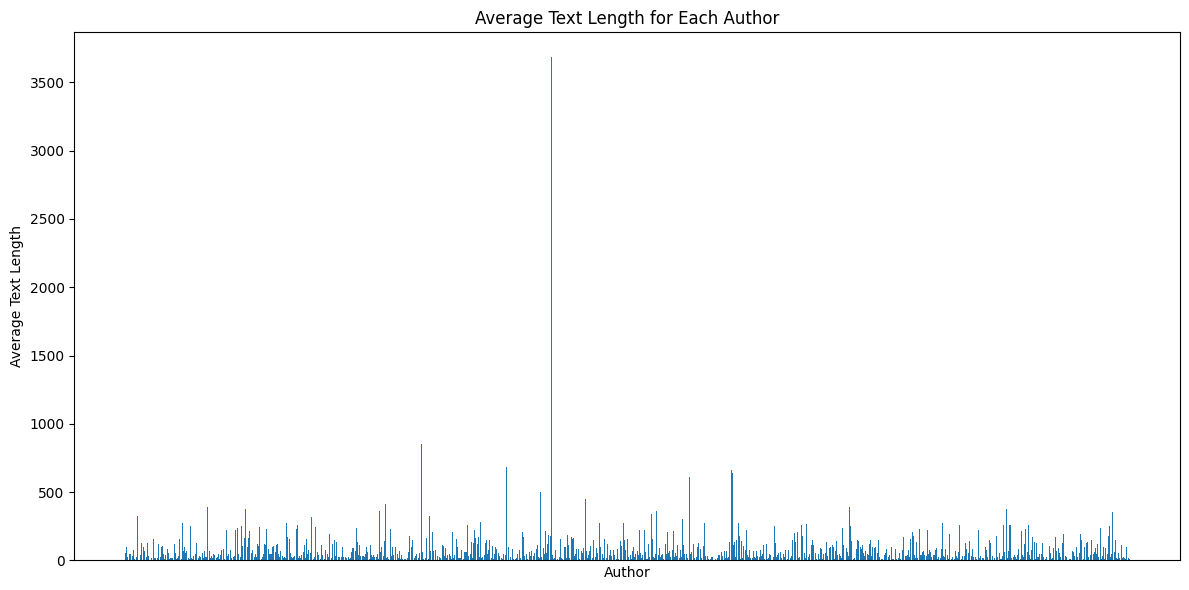

In [128]:
from pyspark.sql.functions import col, avg, broadcast
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, avg, max, min, length
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import broadcast

# Step 1: Initialize SparkSession
spark = SparkSession.builder.appName("DataInsights").getOrCreate()

# Step 2: Read the CSV file into a DataFrame
data = spark.read.csv("/content/train.csv", header=True, inferSchema=True)

# Step 3: Data Transformation - Tokenization
tokenizer = Tokenizer(inputCol="text", outputCol="words")
data = tokenizer.transform(data)

# Step 4: Data Aggregation - Calculate the number of authors in the dataset
num_authors = data.select(countDistinct("author")).collect()[0][0]
print("Number of authors:", num_authors)

# Step 5: Data Aggregation - Calculate the average length of text for each author
data = data.withColumn("text_length", length(col("text")))
avg_text_length = data.groupBy("author").agg(avg(col("text_length")).alias("avg_text_length"))
avg_text_length.show()

# Step 6: Data Aggregation - Find the author with the maximum number of texts
author_with_max_texts = data.groupBy("author").agg(countDistinct("id").alias("num_texts")).orderBy(col("num_texts").desc()).first()
print("Author with the most texts:", author_with_max_texts["author"], "Number of texts:", author_with_max_texts["num_texts"])

# Step 7: Data Aggregation - Find the author with the longest and shortest text
author_with_longest_text = data.orderBy(col("text_length").desc()).first()
author_with_shortest_text = data.orderBy(col("text_length").asc()).first()
print("Author with the longest text:", author_with_longest_text["author"], "Text length:", author_with_longest_text["text_length"])
print("Author with the shortest text:", author_with_shortest_text["author"], "Text length:", author_with_shortest_text["text_length"])

# Step 8: Broadcast the data DataFrame to efficiently distribute the data to all worker nodes
broadcasted_data = data.select("author", "text_length")

# Step 9: Data Aggregation with Broadcast - Calculate the average length of text for each author
avg_text_length_broadcast = broadcasted_data.groupBy("author").agg(avg(col("text_length")).alias("avg_text_length"))

# Convert the DataFrame to a Pandas DataFrame for visualization
avg_text_length_df = avg_text_length_broadcast.toPandas()

# Visualize the average text length for each author using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(avg_text_length_df["author"], avg_text_length_df["avg_text_length"])
plt.xlabel("Author")
plt.ylabel("Average Text Length")
plt.title("Average Text Length for Each Author")
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-axis tick labels
plt.tight_layout()
plt.show()

# Step 10: Clean up and stop the SparkSession
spark.stop()

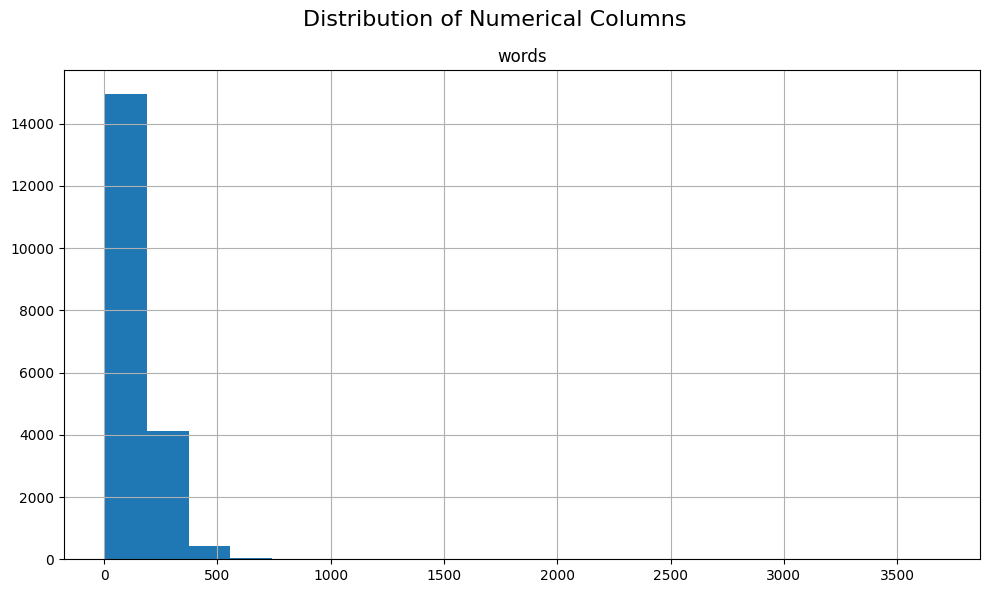

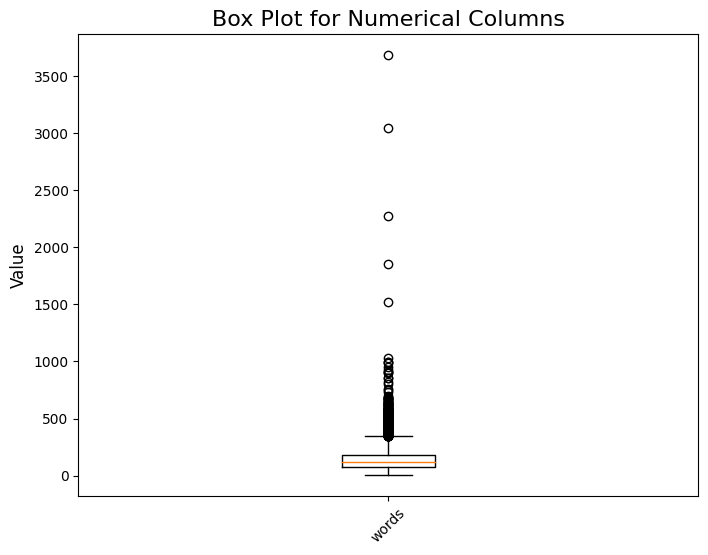

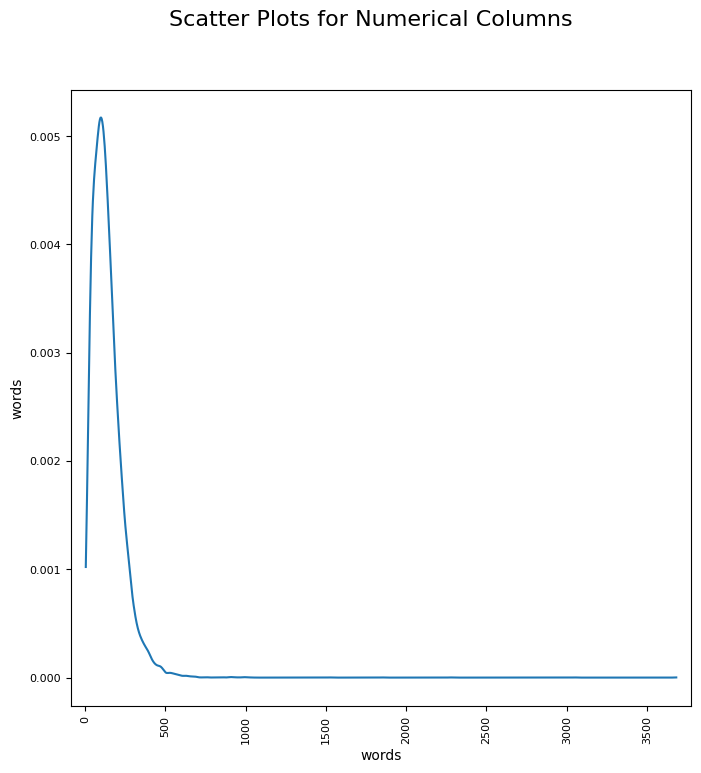

In [137]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, length
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a SparkSession
spark = SparkSession.builder.appName("TextAnalysis").getOrCreate()

# Step 2: Read the CSV file into a DataFrame
data = spark.read.csv("/content/train.csv", header=True, inferSchema=True)

# Step 3: Data Preprocessing - Tokenization
data = data.withColumn("words", length(col("text")))

# Step 4: Data Exploration - Explore the distribution of numerical columns using histograms
# Select the numerical columns to visualize
numerical_cols = ["words"]

# Convert the DataFrame to a Pandas DataFrame for visualization
data_pd = data.select(numerical_cols).toPandas()

# Create histograms for each numerical column
data_pd.hist(figsize=(10, 6), bins=20)
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.tight_layout()
plt.show()

# Step 5: Data Exploration - Identify and handle outliers using box plots
# Create box plots for each numerical column
plt.figure(figsize=(8, 6))
plt.boxplot(data_pd[numerical_cols].values, labels=numerical_cols)
plt.title("Box Plot for Numerical Columns", fontsize=16)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Step 6: Data Exploration - Explore the relationships between numerical columns using scatter plots
# Select numerical columns for scatter plot
scatter_cols = ["words"]

# Convert the DataFrame to a Pandas DataFrame for visualization
scatter_pd = data.select(scatter_cols).toPandas()

# Create scatter plots for each pair of numerical columns
pd.plotting.scatter_matrix(scatter_pd, figsize=(8, 8), diagonal="kde")
plt.suptitle("Scatter Plots for Numerical Columns", fontsize=16)
plt.show()

# Step 7: Clean up and stop the SparkSession
spark.stop()
